In [102]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Pre-process Data

In [103]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    './',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    './',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 48 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


Define the Model

In [104]:
model = Sequential([
    Input(shape=(150, 150, 3)),  # Define the input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')  # Adjust the number of classes as needed
])

Compile the Model

In [105]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Images check

In [110]:
from PIL import Image
import os

def check_images(directory):
    print(f"Checking images in {directory}")
    checked_images = 0  # Counter for the number of images checked
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg')):  # Target common image formats
                img_path = os.path.join(root, file)
                print(f"Checking image: {img_path}")
                checked_images += 1
                try:
                    with Image.open(img_path) as img:
                        img.verify()  # Verify it opens as an image
                except (IOError, OSError, Image.UnidentifiedImageError, SyntaxError) as e:
                    print(f"Problem with image {img_path}: {e}")
    print(f"Total images checked: {checked_images}")

check_images('./')

Checking images in ./
Checking image: ./Pants\download (0).jpg
Checking image: ./Pants\download (1).jpg
Checking image: ./Pants\download (10).jpg
Checking image: ./Pants\download (11).jpg
Checking image: ./Pants\download (12).jpg
Checking image: ./Pants\download (13).jpg
Checking image: ./Pants\download (14).jpg
Checking image: ./Pants\download (15).jpg
Checking image: ./Pants\download (16).jpg
Checking image: ./Pants\download (17).jpg
Checking image: ./Pants\download (18).jpg
Checking image: ./Pants\download (19).jpg
Checking image: ./Pants\download (2).jpg
Checking image: ./Pants\download (3).jpg
Checking image: ./Pants\download (4).jpg
Checking image: ./Pants\download (5).jpg
Checking image: ./Pants\download (6).jpg
Checking image: ./Pants\download (7).jpg
Checking image: ./Pants\download (8).jpg
Checking image: ./Pants\download (9).jpg
Checking image: ./Shirts\download (0).jpg
Checking image: ./Shirts\download (1).jpg
Checking image: ./Shirts\download (10).jpg
Checking image: ./Shi

Train the Model

In [107]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 1.0866 - val_accuracy: 0.3333 - val_loss: 3.0511
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.4375 - loss: 2.9616 - val_accuracy: 0.3333 - val_loss: 3.3503
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.4062 - loss: 3.5333 - val_accuracy: 0.3333 - val_loss: 2.5984
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.3750 - loss: 2.4871 - val_accuracy: 0.3333 - val_loss: 1.2853
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.4688 - loss: 1.0978 - val_accuracy: 0.5833 - val_loss: 0.9507
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.5000 - loss: 0.9647 - val_accuracy: 0.5000 - val_loss: 0.9092
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.8125 - loss: 0.7871 - val_accuracy: 0.6667 - val_loss: 1.0416
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.5312 - loss: 1.0955 - val_accuracy: 0.5833 - val_loss: 0.

Evaluate and Predict

In [108]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy}")

# Making predictions
predictions = model.predict(validation_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6667 - loss: 0.7058
Validation Accuracy: 0.6666666865348816
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Visualizing Performance

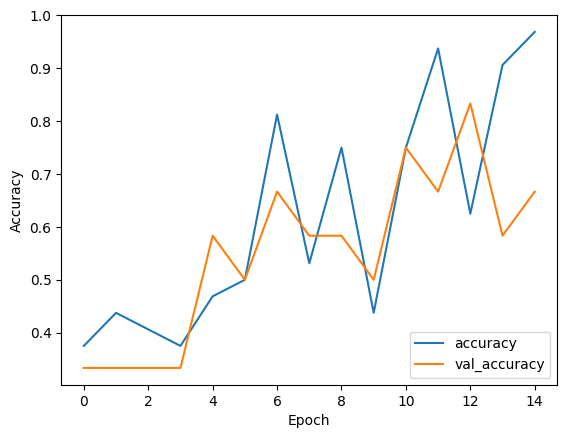

In [109]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()